# Exercise 3: Preparing Real-World Data for a Neural Network

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Describe the Data


- `PassengerId` - A unique Id for each passenger. Each Id takes the form `gggg_pp` where `gggg` indicates a group the passenger is travelling with and `pp` is their number within the group. People in a group are often family members, but not always.
- `HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.
- `CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- `Cabin` - The cabin number where the passenger is staying. Takes the form `deck/num/side`, where `side` can be either `P` for Port or `S` for Starboard.
- `Destination` - The planet the passenger will be debarking to.
- `Age` - The age of the passenger.
- `VIP` - Whether the passenger has paid for special VIP service during the voyage.
- `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- `Name` - The first and last names of the passenger.
- `Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

print("Numerics:", num_cols)
print("Categoricals:", cat_cols)

Numéricas: Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')
Categóricas: Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')


- `Númericas`: Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
- `Categóricas`: PassengerId, HomePlanet, CryoSleep, Cabin, Destination, VIP, Name

In [7]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
df.isnull().mean() * 100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

## Preprocess the Data

In [ ]:
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split

# Engenharia (Cabin) e limpeza
df2 = df.copy()
df2['Cabin'] = df2['Cabin'].fillna('Unknown/0/Unknown')
cabin_split = df2['Cabin'].str.split('/', expand=True)
df2['Cabin_deck'] = cabin_split[0].fillna('Unknown')
df2['Cabin_side'] = cabin_split[2].fillna('Unknown')
df2 = df2.drop(columns=[c for c in ['PassengerId','Name','Cabin'] if c in df2.columns])

# Alvo e features
if 'Transported' in df2.columns:
    y = df2['Transported'].astype(int) if df2['Transported'].dtype == 'bool' else df2['Transported']
    X = df2.drop(columns=['Transported'])
else:
    y = None
    X = df2

# Listas de colunas existentes
num_cols_all = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
cat_cols_all = ['HomePlanet','CryoSleep','Destination','VIP','Cabin_deck','Cabin_side']
num_cols = [c for c in num_cols_all if c in X.columns]
cat_cols = [c for c in cat_cols_all if c in X.columns]

# Transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',  StandardScaler(with_mean=True, with_std=True)),
])

try:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype=np.float32)
except TypeError:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=False, dtype=np.float32)

categorical_transformer = Pipeline(steps=[
    # Garantir que os NaNs virem uma categoria válida
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    # Forçar tudo para string para evitar tipos (bool/str)
    ('to_str', FunctionTransformer(lambda X: pd.DataFrame(X).astype(str), feature_names_out='one-to-one')),
    ('onehot',  ohe),
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols),
    ],
    remainder='drop',
)

# Split
if y is not None:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42,
        stratify=y if hasattr(y, 'nunique') and y.nunique() <= 20 else None
    )
else:
    X_train, X_test, y_train, y_test = X, None, None, None

# Fit/transform
X_train_proc = preprocessor.fit_transform(X_train).astype(np.float32, copy=False)

# Nomes das features
try:
    feature_names = preprocessor.get_feature_names_out().tolist()
    feature_names = [f.split('__', 1)[1] if '__' in f else f for f in feature_names]
except Exception:
    feature_names = [f'feat_{i}' for i in range(X_train_proc.shape[1])]

X_train_df = pd.DataFrame(X_train_proc, columns=feature_names, index=getattr(X_train, 'index', None))

X_test_df = None
if X_test is not None:
    X_test_proc = preprocessor.transform(X_test).astype(np.float32, copy=False)
    X_test_df = pd.DataFrame(X_test_proc, columns=feature_names, index=getattr(X_test, 'index', None))

print('Shapes:')
print('X_train:', X_train.shape, '->', X_train_df.shape)
if X_test_df is not None:
    print('X_test :', X_test.shape,  '->', X_test_df.shape)

Shapes:
X_train: (6954, 12) -> (6954, 32)
X_test : (1739, 12) -> (1739, 32)


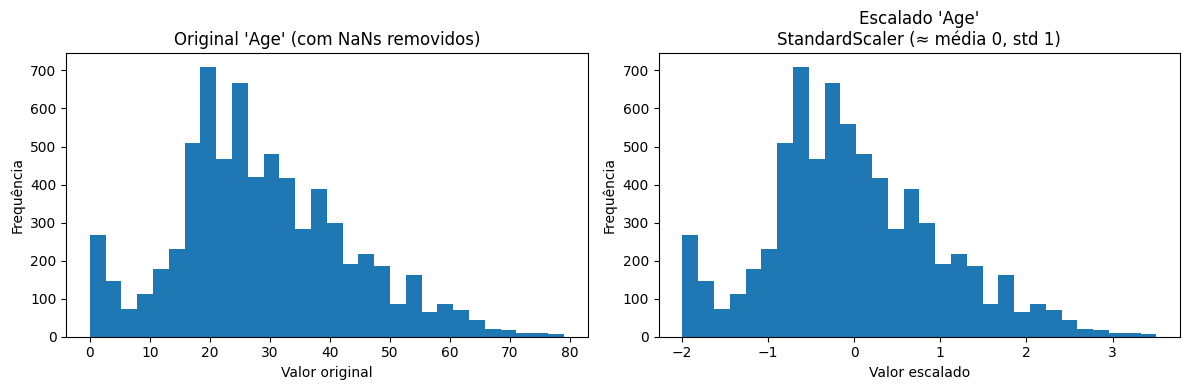

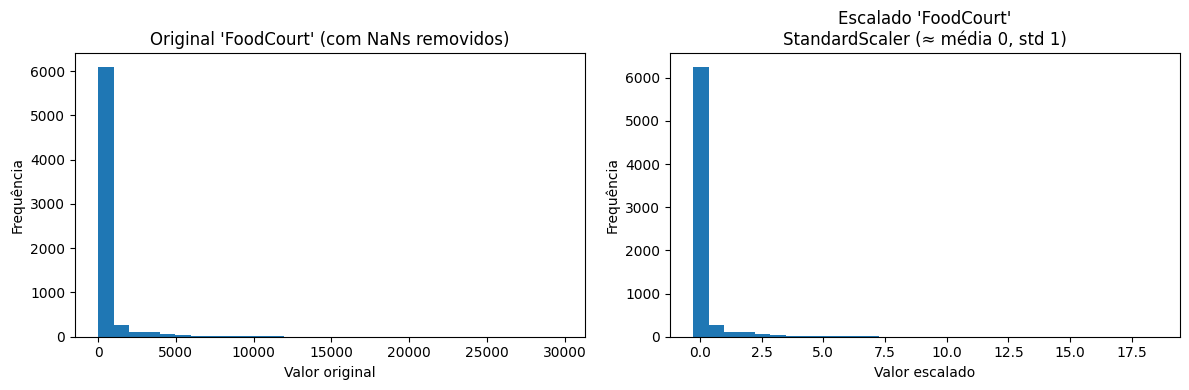

In [ ]:
import matplotlib.pyplot as plt
from numbers import Number

def plot_before_after(feature, bins=30):
    """
    Plota histogramas do valor original (com imputação) e do valor escalado
    para uma feature numérica específica, usando exatamente os parâmetros
    fitados no seu preprocessor (imputer + scaler).
    """
    if feature not in num_cols:
        raise ValueError(f"'{feature}' não está em num_cols: {num_cols}")

    num_pipe = preprocessor.named_transformers_['num']
    imputer = num_pipe.named_steps['imputer']
    scaler = num_pipe.named_steps.get('scaler', None)
    feat_index = num_cols.index(feature)

    # Série original + imputação (mediana) para NaNs
    s_orig = X_train[feature]
    median = imputer.statistics_[feat_index]
    s_imputed = s_orig.fillna(median)

    # Aplica o mesmo scaling usado no treino
    if scaler is None:
        s_scaled = s_imputed  # sem scaler (improvável no seu caso)
        scale_desc = "Sem escala"
    elif hasattr(scaler, "mean_") and hasattr(scaler, "scale_"):
        # StandardScaler
        mu = scaler.mean_[feat_index]
        sigma = scaler.scale_[feat_index]
        # Evita divisão por zero (coluna constante)
        sigma = sigma if isinstance(sigma, Number) and sigma != 0 else 1.0
        s_scaled = (s_imputed - mu) / sigma
        scale_desc = "StandardScaler (≈ média 0, std 1)"
    elif hasattr(scaler, "data_min_") and hasattr(scaler, "data_max_"):
        # MinMaxScaler (respeita feature_range)
        data_min = scaler.data_min_[feat_index]
        data_max = scaler.data_max_[feat_index]
        data_range = data_max - data_min if data_max != data_min else 1.0
        # escala para [0,1]
        s01 = (s_imputed - data_min) / data_range
        fr_min, fr_max = scaler.feature_range
        s_scaled = s01 * (fr_max - fr_min) + fr_min
        scale_desc = f"MinMaxScaler (range {scaler.feature_range})"
    else:
        s_scaled = s_imputed
        scale_desc = "Scaler não reconhecido"

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].hist(s_orig.dropna(), bins=bins)
    axes[0].set_title(f"Original '{feature}' (com NaNs removidos)")
    axes[0].set_xlabel("Valor original")
    axes[0].set_ylabel("Frequência")

    axes[1].hist(pd.Series(s_scaled).dropna(), bins=bins)
    axes[1].set_title(f"Escalado '{feature}'\n{scale_desc}")
    axes[1].set_xlabel("Valor escalado")
    axes[1].set_ylabel("Frequência")

    plt.tight_layout()
    plt.show()

plot_before_after("Age")
plot_before_after("FoodCourt")